In [51]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
from matplotlib import style

style.use("ggplot")

In [5]:
df = pd.read_csv("data/train.csv",index_col="id")

In [6]:
df.head()

,sudden_fever,headache,mouth_bleed,nose_bleed,muscle_pain,joint_pain,vomiting,rash,diarrhea,hypotension,...,breathing_restriction,toe_inflammation,finger_inflammation,lips_irritation,itchiness,ulcers,toenail_loss,speech_problem,bullseye_rash,prognosis
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lyme_disease
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tungiasis
2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,Lyme_disease
3,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zika
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,Rift_Valley_fever


In [12]:
df.prognosis.value_counts()

West_Nile_fever          85
Japanese_encephalitis    81
Tungiasis                70
Rift_Valley_fever        70
Chikungunya              66
Dengue                   63
Yellow_Fever             61
Zika                     58
Plague                   53
Lyme_disease             52
Malaria                  48
Name: prognosis, dtype: int64

In [36]:
number_positiv = []
for col in df.columns[:-1]:
    print(df[col].value_counts())
    number_positiv.append(df[col].value_counts().to_dict()[1])

1.0    356
0.0    351
Name: sudden_fever, dtype: int64
0.0    389
1.0    318
Name: headache, dtype: int64
0.0    382
1.0    325
Name: mouth_bleed, dtype: int64
0.0    362
1.0    345
Name: nose_bleed, dtype: int64
1.0    366
0.0    341
Name: muscle_pain, dtype: int64
0.0    389
1.0    318
Name: joint_pain, dtype: int64
0.0    395
1.0    312
Name: vomiting, dtype: int64
0.0    362
1.0    345
Name: rash, dtype: int64
0.0    431
1.0    276
Name: diarrhea, dtype: int64
0.0    429
1.0    278
Name: hypotension, dtype: int64
0.0    437
1.0    270
Name: pleural_effusion, dtype: int64
0.0    443
1.0    264
Name: ascites, dtype: int64
0.0    452
1.0    255
Name: gastro_bleeding, dtype: int64
0.0    467
1.0    240
Name: swelling, dtype: int64
0.0    439
1.0    268
Name: nausea, dtype: int64
0.0    428
1.0    279
Name: chills, dtype: int64
0.0    453
1.0    254
Name: myalgia, dtype: int64
0.0    440
1.0    267
Name: digestion_trouble, dtype: int64
0.0    479
1.0    228
Name: fatigue, dtype: int64
0

In [37]:
df.headache.value_counts().to_dict()

{0.0: 389, 1.0: 318}

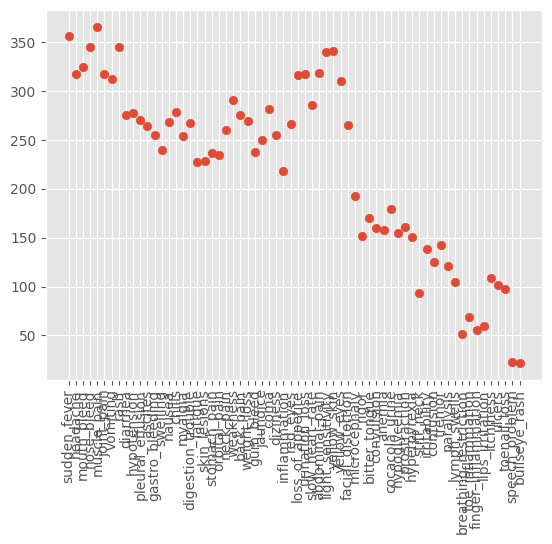

<Figure size 2000x2000 with 0 Axes>

In [53]:
plt.scatter([col for col in df.columns[:-1]],number_positiv)
plt.xticks(rotation=90)
plt.figure(figsize=(20,20))

-----Lyme_disease-----


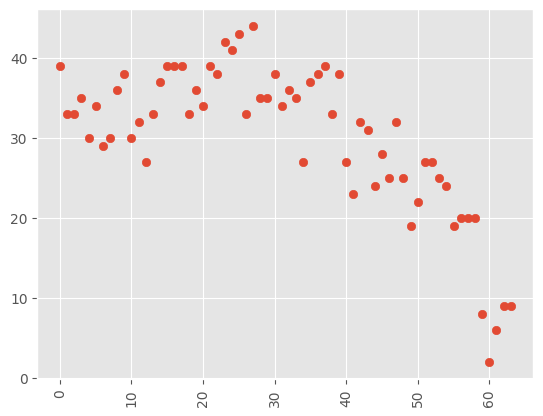

-----Tungiasis-----


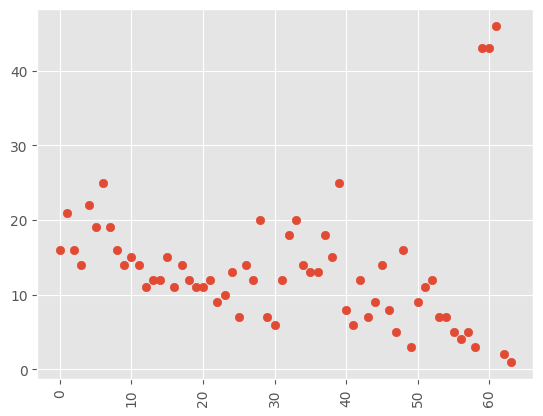

-----Zika-----


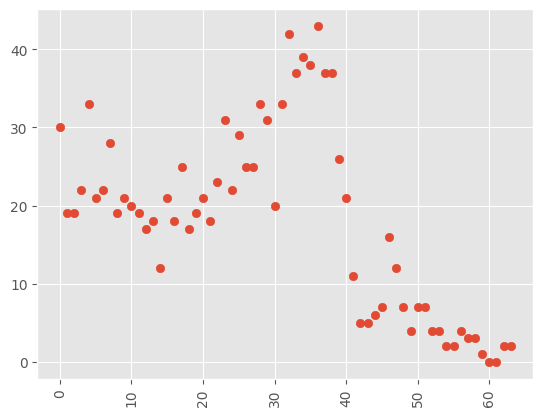

-----Rift_Valley_fever-----


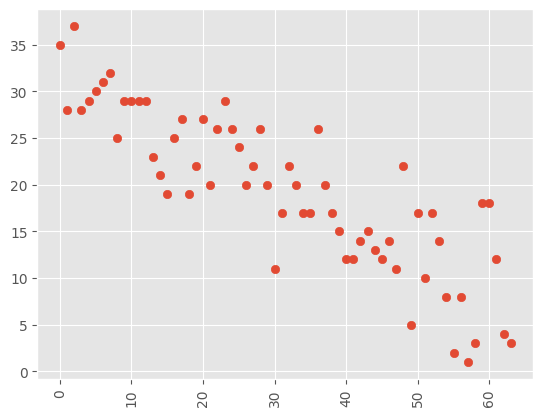

-----West_Nile_fever-----


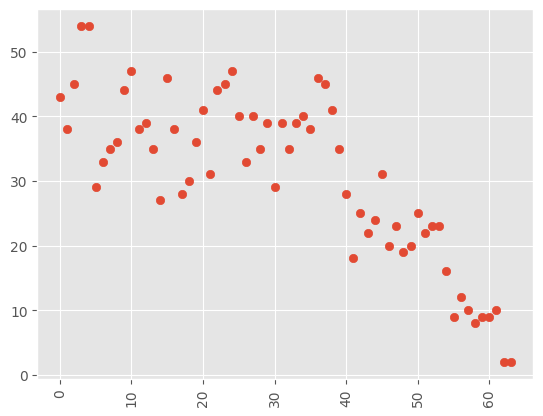

-----Malaria-----


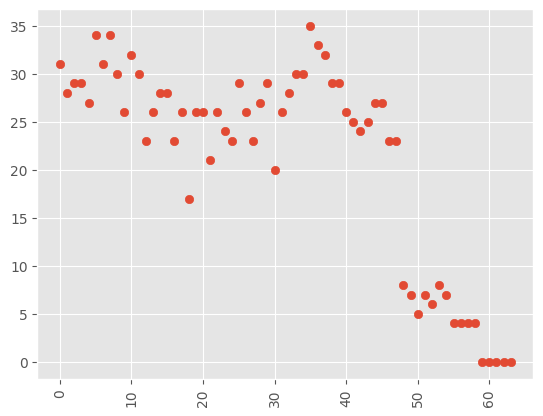

-----Chikungunya-----


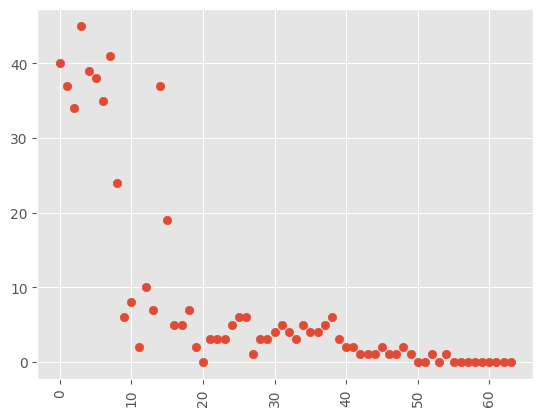

-----Plague-----


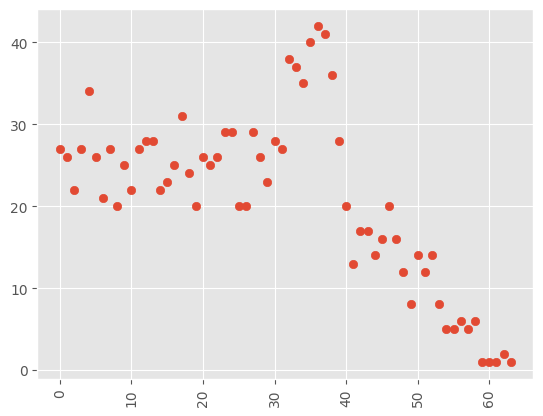

-----Dengue-----


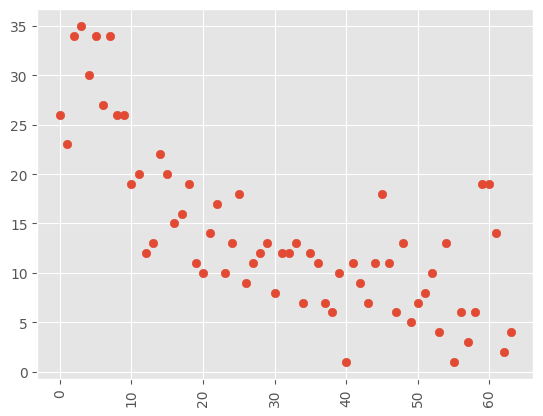

-----Yellow_Fever-----


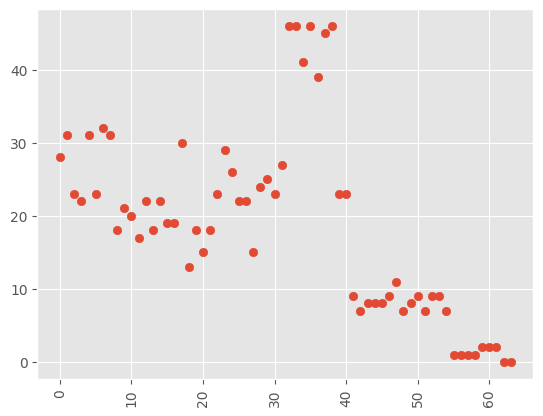

-----Japanese_encephalitis-----


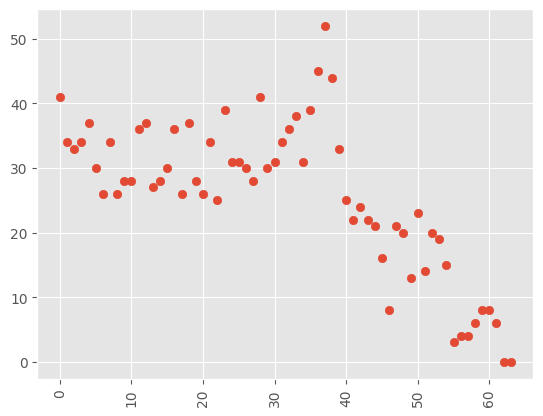

In [63]:
total_case = []
for disease in df.prognosis.unique():
    prog = df[df.prognosis == disease]
    number_positiv = []
    for col in prog.columns[:-1]:
        try:
            number_positiv.append(prog[col].value_counts().to_dict()[1])
        except:
            number_positiv.append(0)
    print(f'-----{disease}-----')
    plt.scatter([i for i in range(0,64)],number_positiv)
    plt.xticks(rotation=90)
    plt.show()

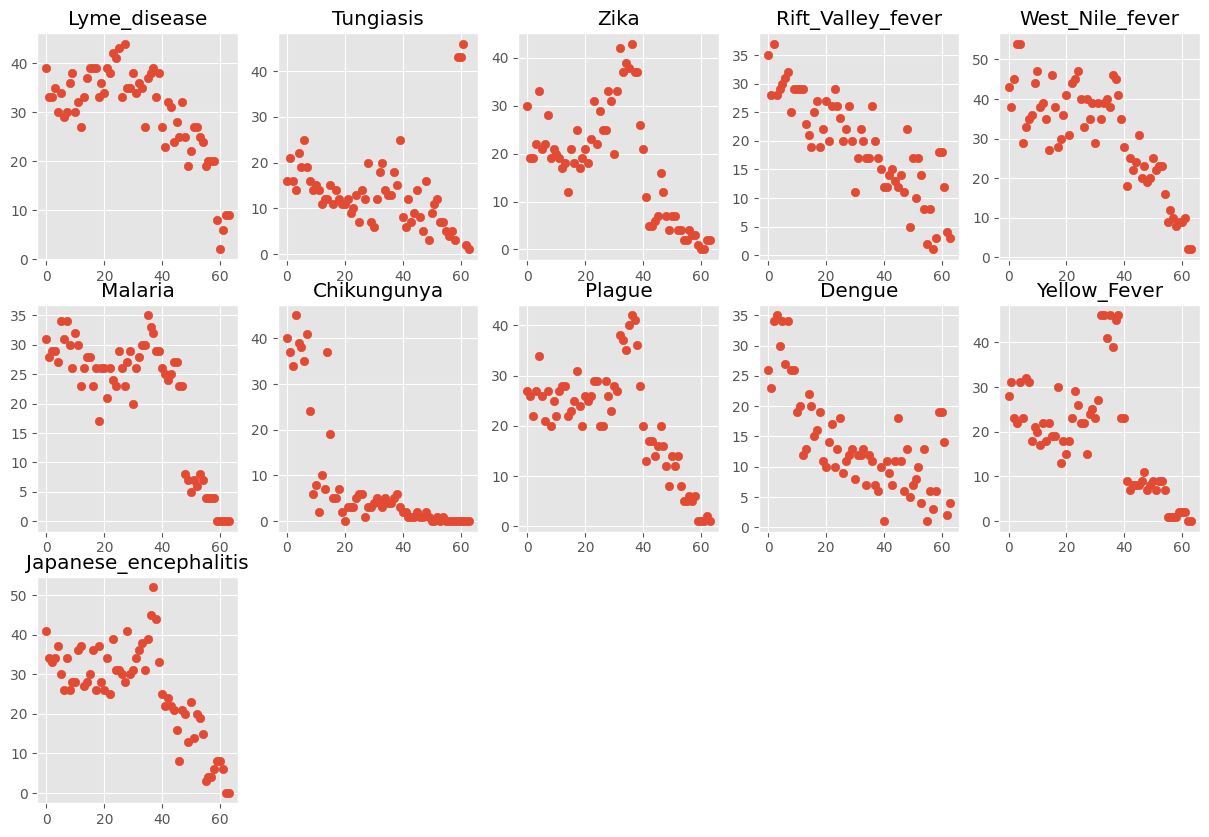

In [72]:
total_case = []
for disease in df.prognosis.unique():
    prog = df[df.prognosis == disease]
    number_positiv = []
    for col in prog.columns[:-1]:
        try:
            number_positiv.append(prog[col].value_counts().to_dict()[1])
        except:
            number_positiv.append(0)
    total_case.append(number_positiv)

fig,(ax1,ax2,ax3) = plt.subplots(3,5,figsize=(15,10))
for case,ax,disease in zip(total_case[:5],ax1,df.prognosis.unique()[:5]):
    ax.scatter([i for i in range(0,64)],case)
    ax.set_title(disease)

for case,ax,disease in zip(total_case[5:10],ax2,df.prognosis.unique()[5:10]):
    ax.scatter([i for i in range(0,64)],case)
    ax.set_title(disease)
    
for case,ax,disease in zip(total_case[10:],ax3,df.prognosis.unique()[10:]):
    ax.scatter([i for i in range(0,64)],case)
    ax.set_title(disease)

for ax in ax3[1:]:
    ax.axis("off")

In [61]:
a = df[df.prognosis == "Zika"]
number_positiv = [a[col].value_counts().to_dict() for col in a.columns[:-1]]
number_positiv


[{1.0: 30, 0.0: 28},
 {0.0: 39, 1.0: 19},
 {0.0: 39, 1.0: 19},
 {0.0: 36, 1.0: 22},
 {1.0: 33, 0.0: 25},
 {0.0: 37, 1.0: 21},
 {0.0: 36, 1.0: 22},
 {0.0: 30, 1.0: 28},
 {0.0: 39, 1.0: 19},
 {0.0: 37, 1.0: 21},
 {0.0: 38, 1.0: 20},
 {0.0: 39, 1.0: 19},
 {0.0: 41, 1.0: 17},
 {0.0: 40, 1.0: 18},
 {0.0: 46, 1.0: 12},
 {0.0: 37, 1.0: 21},
 {0.0: 40, 1.0: 18},
 {0.0: 33, 1.0: 25},
 {0.0: 41, 1.0: 17},
 {0.0: 39, 1.0: 19},
 {0.0: 37, 1.0: 21},
 {0.0: 40, 1.0: 18},
 {0.0: 35, 1.0: 23},
 {1.0: 31, 0.0: 27},
 {0.0: 36, 1.0: 22},
 {0.0: 29, 1.0: 29},
 {0.0: 33, 1.0: 25},
 {0.0: 33, 1.0: 25},
 {1.0: 33, 0.0: 25},
 {1.0: 31, 0.0: 27},
 {0.0: 38, 1.0: 20},
 {1.0: 33, 0.0: 25},
 {1.0: 42, 0.0: 16},
 {1.0: 37, 0.0: 21},
 {1.0: 39, 0.0: 19},
 {1.0: 38, 0.0: 20},
 {1.0: 43, 0.0: 15},
 {1.0: 37, 0.0: 21},
 {1.0: 37, 0.0: 21},
 {0.0: 32, 1.0: 26},
 {0.0: 37, 1.0: 21},
 {0.0: 47, 1.0: 11},
 {0.0: 53, 1.0: 5},
 {0.0: 53, 1.0: 5},
 {0.0: 52, 1.0: 6},
 {0.0: 51, 1.0: 7},
 {0.0: 42, 1.0: 16},
 {0.0: 46, 1.0: 1